[1 1 0 2 1 2 0 2 0 0 0 2 0 0 1 0 1 2 0 0 0 0 2 1 0 1 1 2 2 0 0 0 1 0 1 0 1
 2 1 2 2 0 1 2 0 0 1 2 1 2 2 1 1 0 1 2 1 0 2 0 1 2 2 1 1 2 2 1 1 0 2 1 1 0
 0 1 1 2 0 2 0 0 1 0 2 1 1 0 2 0 1 0 1 0 0 1 1 0 1 1 2 0 2 0 0 0 0 0 2 1 2
 0 0 0 0 2 1 2 1 2 2 2 0 1 1 1 1 0 1 1 0 0 0 0 0 2 2 1 0 1 0 0 1 0 2 2 2 0
 2 0 0 1 2 1 0 2 2 1 1 0 0 1 1 1 0 1 2 0 0 0 0 0 2 0 2 2 2 0 2 2 1 0 1 2 2
 1 2 0 2 2 1 1 2 1 2 2 2 2 0 1 0 0 2 2 0 2 1 1 2 0 0 1 2 2 1 1 1 1 0 1 1 2
 1 1 0 2 1 1 2 0 0 1 0 1 2 2 1 2 1 1 1 2 2 0 1 2 2 2 1 2 1 2 1 2 2 1 2 0 1
 0 0 0 1 0 2 2 1 2 2 0 0 2 2 2 1 1 1 0 0 0 2 2 2 2 1 2 1 2 2 1 0 2 2 0 1 0
 2 0 1 1]
簇内平方和SSE: 18.263159330895956
轮廓系数: 0.8482330810203894
CH指数: 4730.173967940951
类别为1的数据（前五个）: [[-1.17252292 -1.37037478]
 [-1.25431875 -1.30020394]
 [-1.49451639 -1.39423947]
 [-1.21153538 -1.31567263]
 [-1.41077697 -1.23495683]]


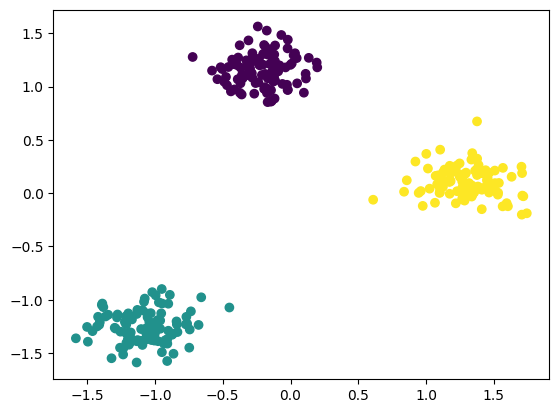

In [14]:
# API介绍

# 1. 导包
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt


# 2. 生成模拟数据
# n_samples: 样本数量
# n_features: 特征数量
# centers: 聚类中心数量
# cluster_std: 簇内标准差
X, _ = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=1.0,  random_state=42)

# 3. 标准化
sd = StandardScaler()
X = sd.fit_transform(X)

# 4. 创建模型
# n_clusters: 聚类数量
kmeans = KMeans(n_clusters=3, random_state=42)

# 5. 训练模型
kmeans.fit(X)

# 6. 输出聚类标签
labels = kmeans.predict(X)
print(labels)

# 7. 模型评估
print("簇内平方和SSE:", kmeans.inertia_)
print("轮廓系数:", silhouette_score(X, labels))
print("CH指数:", calinski_harabasz_score(X, labels))

# 8. 可视化
# c: 颜色， labels: 按簇着色
plt.scatter(X[:, 0], X[:, 1], c=labels)

# 9. 展示类别为1的数据（前五个）
class_1_data = X[labels == 1][:5]
print("类别为1的数据（前五个）:", class_1_data)


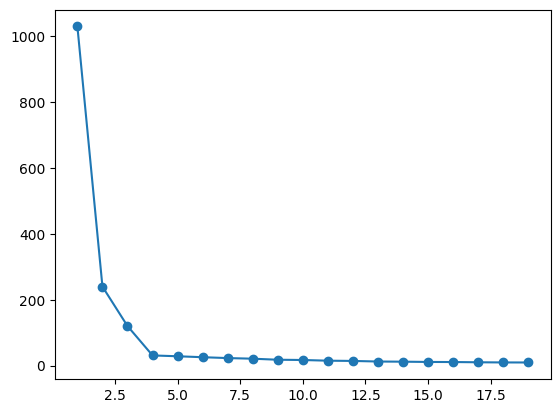

In [15]:
# K-means，使用肘部法确定K值

# 1. 导包
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# 2. 创建数据集
X, y = make_blobs(n_samples=400, n_features=4, centers=[[-1,-1],[0,0],[1,1],[2,2]], cluster_std=0.2, random_state=42)
# plt.scatter(X[:, 0], X[:, 1])

# 3. 肘部法确定K值
SSE = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

# 4. 绘制
plt.plot(range(1, 20), SSE, marker='o')

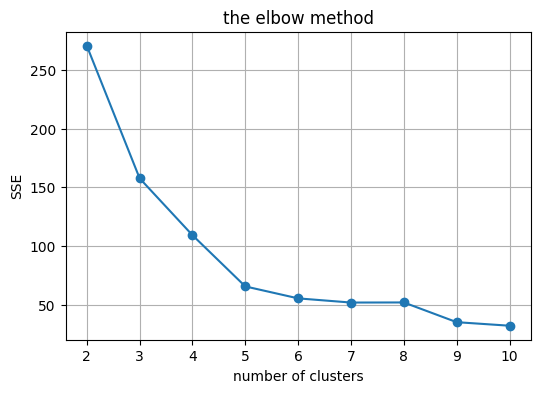

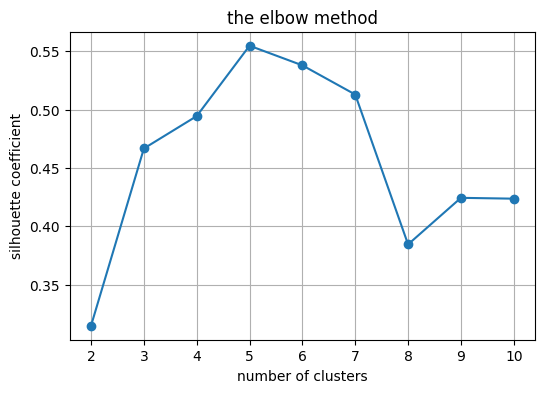

In [16]:
# 聚类，客户分析案例

# 1. 导包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score

# 2. 获取数据
data = pd.read_csv('data/customers.csv')
data.head()

# 3. 确定数据
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

# 4. 数据处理
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 5. 肘部法训练模型
SSE = []
SC = []
for k in range(2, 11):
    estimator = KMeans(n_clusters=k)  # 创建KMeans聚类器，设置k个聚类中心
    estimator.fit(X)  # 拟合数据X，进行聚类
    SSE.append(estimator.inertia_)  # 将每个聚类模型的SSE（组内误差平方和）添加到SSE列表
    SC.append(silhouette_score(X, estimator.labels_))  # 计算轮廓系数并加入SC列表

# 绘制图1 ---SSE变化曲线
plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), SSE, 'o-')
plt.title("the elbow method")
plt.xlabel("number of clusters")
plt.ylabel("SSE")
plt.grid()
plt.show()

# 绘制图2 ---SC变化曲线
plt.figure(figsize=(6, 4))
plt.plot(range(2, 11), SC, 'o-')
plt.title("the elbow method")
plt.xlabel("number of clusters")
plt.ylabel("silhouette coefficient")
plt.grid()
plt.show()